In [ ]:

! pip install netCDF4
! pip uninstall -y scikit-learn
! pip install --no-cache-dir scikit-learn
! pip install --upgrade MDAnalysis
! pip install --upgrade MDAnalysisTests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.7 MB/s eta 0:00:00
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 MB 10.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.0/543.0 kB 29.7 MB/s eta 0:00:00
  Created wheel for MDAnalysi

Generating 3D t-SNE plot...


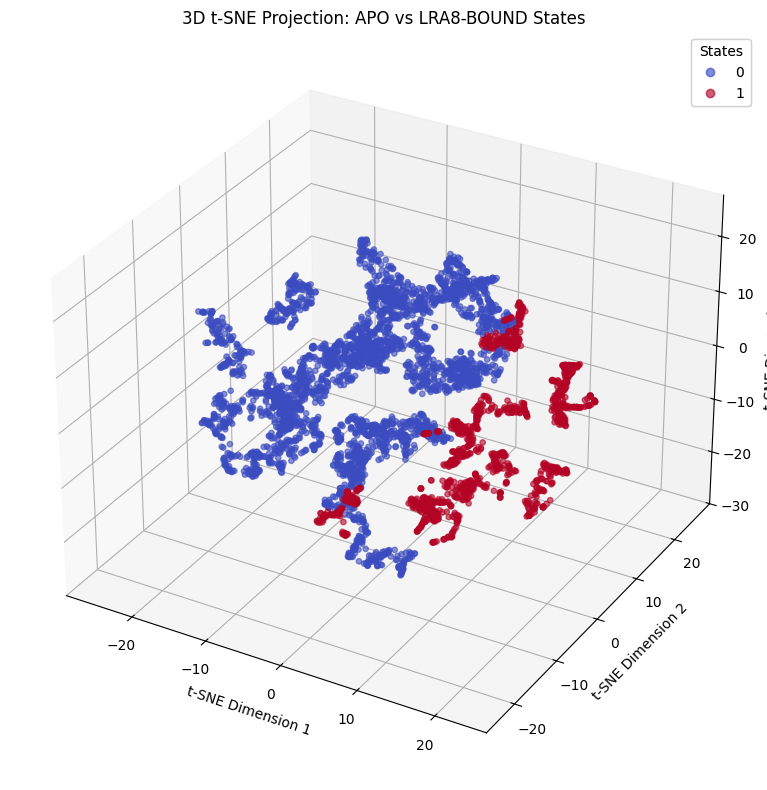

3D t-SNE plot generated.


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Ensure X and y are available from previous execution
# If not, you might need to re-run the data collection cells

print("Generating 3D t-SNE plot...")

# Using a sample for t-SNE if dataset is very large to speed up rendering
# Using the full feature matrix X
sub_idx_3d = np.random.choice(len(X), min(5000, len(X)), replace=False)
X_sub = X[sub_idx_3d]
y_sub = y[sub_idx_3d]

# Scale the data before applying t-SNE
scaler_3d = StandardScaler()
X_scaled_3d = scaler_3d.fit_transform(X_sub)

# Apply t-SNE with 3 components for 3D visualization
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_scaled_3d)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot, colored by state (APO vs LRA8-BOUND)
scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=y_sub, cmap='coolwarm', s=15, alpha=0.6)

ax.set_title('3D t-SNE Projection: APO vs LRA8-BOUND States')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="States")
ax.add_artist(legend1)

plt.tight_layout()
plt.show()

print("3D t-SNE plot generated.")

/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/XDR.py:310: UserWarning: seek failed, recalculating offsets and retrying
  warnings.warn("seek failed, recalculating offsets and retrying")
/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/XDR.py:310: UserWarning: seek failed, recalculating offsets and retrying
  warnings.warn("seek failed, recalculating offsets and retrying")
/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/XDR.py:310: UserWarning: seek failed, recalculating offsets and retrying
  warnings.warn("seek failed, recalculating offsets and retrying")
/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/XDR.py:310: UserWarning: seek failed, recalculating offsets and retrying
  warnings.warn("seek failed, recalculating offsets and retrying")
/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/XDR.py:310: UserWarning: seek failed, recalculating offsets and retrying
  warnings.warn("seek failed, recalculating offsets 


LOGO-CV Accuracy: 0.939
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1684
           1       0.79      1.00      0.88       510

    accuracy                           0.94      2194
   macro avg       0.90      0.96      0.92      2194
weighted avg       0.95      0.94      0.94      2194



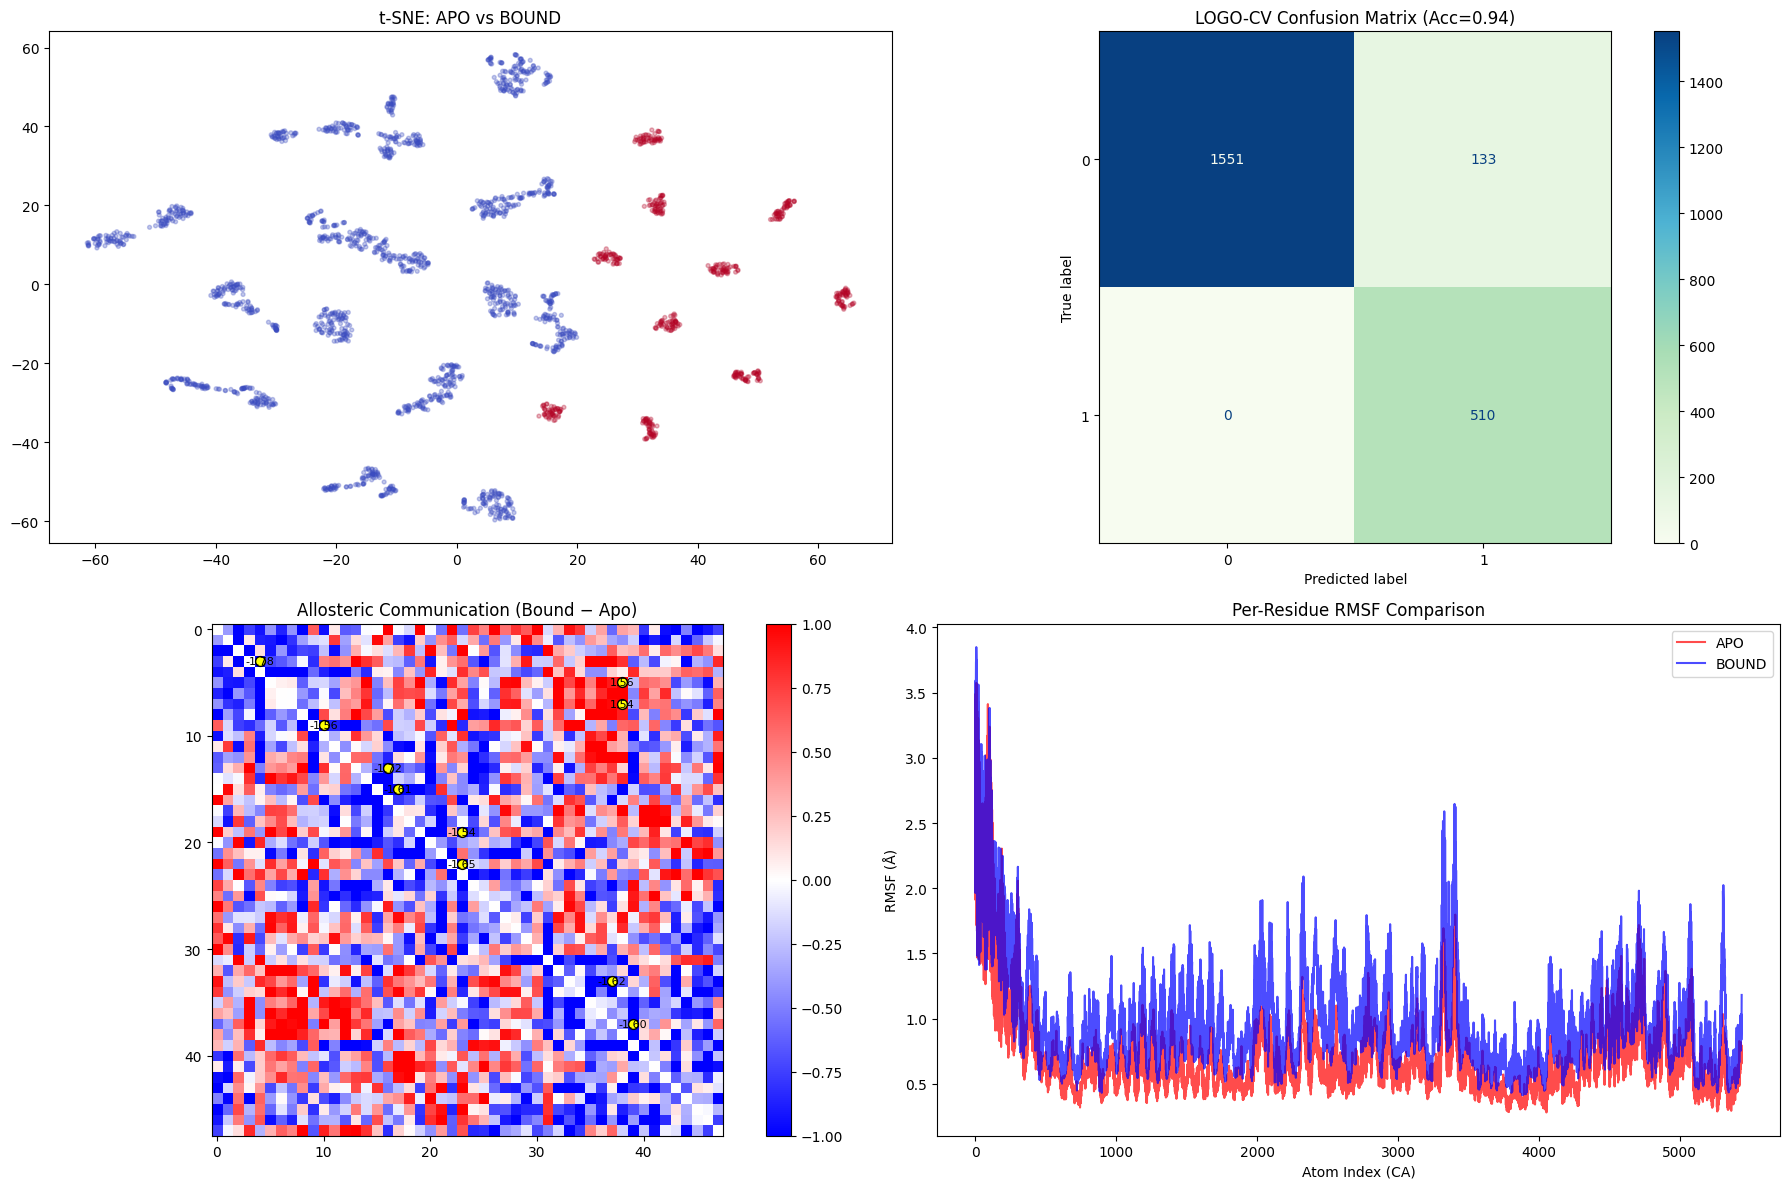

In [ ]:
# ============================================================
# IMPORTS
# ============================================================
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.lib.distances import distance_array
from MDAnalysis.analysis.dihedrals import Ramachandran

from sklearn.model_selection import LeaveOneGroupOut, cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, HistGradientBoostingClassifier
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.manifold import TSNE

# ============================================================
# CONFIGURATION
# ============================================================
STRIDE = 20
TSNE_SUBSAMPLE = 5000
KPCA_COMPONENTS = 5
TOP_LINKS = 10  # Highlight top allosteric correlations

# File paths
apo_xtcs = [f"/content/sample_data/apo/prod_nosolv{str(i).zfill(2)}_ca_prot_aligned.xtc" for i in range(1, 11)]
bound_xtcs = [f"/content/sample_data/bound/prod_nosolv{str(i).zfill(2)}_ca_prot_aligned.xtc" for i in range(1, 11)]
pdb_path = "/content/sample_data/ref_ca_prot_aligned.pdb"

# ============================================================
# FEATURE EXTRACTION FUNCTION
# ============================================================
def extract_features(pdb_file, xtc_file, stride=STRIDE, global_pca=None):
    u = mda.Universe(pdb_file, xtc_file, in_memory=False, lowmem=True)
    ca = u.select_atoms("name CA")
    pocket4_loop = u.select_atoms("resid 1618:1626 and name CA")
    active_site = u.select_atoms("resid 1910:1930 and name CA")
    act_loop = u.select_atoms("resid 2020:2040 and name CA")

    if len(pocket4_loop) == 0 or len(active_site) == 0:
        print(f"Selection failed for {xtc_file}")
        return None, None, None

    all_coords = []
    all_features = []

    # RMSF
    all_positions = np.array([ca.positions.copy() for ts in u.trajectory[::stride]])
    rmsf = np.std(all_positions, axis=0).flatten()

    # Dihedrals
    try:
        dihed = Ramachandran(pocket4_loop).run()
        phi_psi_vals = dihed.results.angles
    except:
        phi_psi_vals = np.zeros((len(u.trajectory[::stride]), len(pocket4_loop), 2))

    for i, ts in enumerate(u.trajectory[::stride]):
        all_coords.append(ca.positions.flatten())
        d_active = distance_array(pocket4_loop.positions, active_site.positions).flatten()
        d_actloop = distance_array(pocket4_loop.positions, act_loop.positions).flatten()

        if phi_psi_vals.shape[0] > i:
            phi = phi_psi_vals[i][:, 0]
            psi = phi_psi_vals[i][:, 1]
            dihed_feat = np.concatenate([np.sin(phi), np.cos(phi), np.sin(psi), np.cos(psi)])
        else:
            dihed_feat = np.zeros(len(pocket4_loop)*4)

        frame_features = np.concatenate([rmsf, d_active, d_actloop, dihed_feat])
        all_features.append(frame_features)

    all_coords = np.array(all_coords)
    all_features = np.array(all_features)

    if global_pca is not None:
        pcs = global_pca.transform(all_coords)
        features = np.hstack([pcs, all_features])
    else:
        features = all_features

    return features, all_coords, rmsf

# ============================================================
# DATA COLLECTION
# ============================================================
X_all, y_all, groups_all = [], [], []
rmsf_apo_all, rmsf_bound_all = [], []
gid = 0

for label, xtcs in [(0, apo_xtcs), (1, bound_xtcs)]:
    for xtc in xtcs:
        feats, coords, rmsf = extract_features(pdb_path, xtc)
        if feats is None:
            continue

        kpca = KernelPCA(n_components=KPCA_COMPONENTS, kernel="rbf")
        coords_kpca = kpca.fit_transform(coords)
        X_rep = np.hstack([coords_kpca, feats])

        X_all.append(X_rep)
        y_all.extend([label]*len(X_rep))
        groups_all.extend([gid]*len(X_rep))

        if label == 0:
            rmsf_apo_all.append(rmsf)
        else:
            rmsf_bound_all.append(rmsf)
        gid += 1

X = np.vstack(X_all)
y = np.array(y_all)
groups = np.array(groups_all)
rmsf_apo_avg = np.mean(rmsf_apo_all, axis=0)
rmsf_bound_avg = np.mean(rmsf_bound_all, axis=0)
print(f"Total frames: {len(X)}, Feature dimension: {X.shape[1]}")

# ============================================================
# ML PIPELINE
# ============================================================
logo = LeaveOneGroupOut()
ensemble = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=2000, class_weight="balanced")),
        ("svc", SVC(kernel="rbf", C=10, probability=True, class_weight="balanced")),
        ("hgb", HistGradientBoostingClassifier(max_iter=100))
    ],
    voting="soft"
)
pipeline = Pipeline([("scaler", RobustScaler()), ("clf", ensemble)])
y_pred = cross_val_predict(pipeline, X, y, groups=groups, cv=logo)
acc = accuracy_score(y, y_pred)
print(f"\nLOGO-CV Accuracy: {acc:.3f}")
print(classification_report(y, y_pred))

# ============================================================
# t-SNE VISUALIZATION
# ============================================================
idx = np.random.choice(len(X), min(TSNE_SUBSAMPLE, len(X)), replace=False)
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42)\
            .fit_transform(RobustScaler().fit_transform(X[idx]))

# ============================================================
# DCCM ALLOSTERIC ANALYSIS
# ============================================================
def compute_dccm(u, ag, stride=STRIDE):
    coords = np.array([ag.positions.copy() for ts in u.trajectory[::stride]])
    mean = coords.mean(axis=0)
    fluc = coords - mean
    n = ag.n_atoms
    dccm = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            num = np.mean(np.sum(fluc[:, i] * fluc[:, j], axis=1))
            den = np.sqrt(np.mean(np.sum(fluc[:, i]**2, axis=1)) *
                          np.mean(np.sum(fluc[:, j]**2, axis=1)))
            dccm[i, j] = num / den if den != 0 else 0
    return dccm

u_apo = mda.Universe(pdb_path, apo_xtcs[0], in_memory=False, lowmem=True)
u_bound = mda.Universe(pdb_path, bound_xtcs[0], in_memory=False, lowmem=True)
lra8_loop = u_apo.select_atoms("resid 1618:1626 and name CA")
active_site = u_apo.select_atoms("resid 1910:1930 and name CA")
act_loop = u_apo.select_atoms("resid 2020:2040 and name CA")
network = lra8_loop + active_site + act_loop
dccm_diff = compute_dccm(u_bound, network) - compute_dccm(u_apo, network)

# ============================================================
# IDENTIFY TOP ALLOSTERIC LINKS
# ============================================================
n_atoms = network.n_atoms
# Get upper triangle indices to avoid redundancy
tri_idx = np.triu_indices(n_atoms, k=1)
# Flatten correlations
flat_corr = dccm_diff[tri_idx]
# Find top absolute correlations
top_idx = np.argsort(np.abs(flat_corr))[-TOP_LINKS:]
top_pairs = [(tri_idx[0][i], tri_idx[1][i], flat_corr[i]) for i in top_idx]

# ============================================================
# PLOTTING
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# t-SNE
axes[0,0].scatter(X_tsne[:,0], X_tsne[:,1], c=y[idx], s=8, alpha=0.3, cmap="coolwarm")
axes[0,0].set_title("t-SNE: APO vs BOUND")

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y, y_pred, ax=axes[0,1], cmap="GnBu")
axes[0,1].set_title(f"LOGO-CV Confusion Matrix (Acc={acc:.2f})")

# DCCM with top-links highlighted
im = axes[1,0].imshow(dccm_diff, cmap="bwr", vmin=-1, vmax=1)
axes[1,0].set_title("Allosteric Communication (Bound − Apo)")
plt.colorbar(im, ax=axes[1,0])
for i,j,val in top_pairs:
    axes[1,0].scatter(j, i, color="yellow", s=50, edgecolors="k")  # Highlight top links
    axes[1,0].text(j, i, f"{val:.2f}", color="black", fontsize=8, ha="center", va="center")

# RMSF Comparison
axes[1,1].plot(rmsf_apo_avg, color="red", alpha=0.7, label="APO")
axes[1,1].plot(rmsf_bound_avg, color="blue", alpha=0.7, label="BOUND")
axes[1,1].set_title("Per-Residue RMSF Comparison")
axes[1,1].set_xlabel("Atom Index (CA)")
axes[1,1].set_ylabel("RMSF (Å)")
axes[1,1].legend()

plt.tight_layout()
plt.show()
print(f"pipeline complete")


/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/XDR.py:310: UserWarning: seek failed, recalculating offsets and retrying
  warnings.warn("seek failed, recalculating offsets and retrying")
/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/XDR.py:310: UserWarning: seek failed, recalculating offsets and retrying
  warnings.warn("seek failed, recalculating offsets and retrying")
/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/XDR.py:310: UserWarning: seek failed, recalculating offsets and retrying
  warnings.warn("seek failed, recalculating offsets and retrying")
/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/XDR.py:310: UserWarning: seek failed, recalculating offsets and retrying
  warnings.warn("seek failed, recalculating offsets and retrying")
/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/XDR.py:310: UserWarning: seek failed, recalculating offsets and retrying
  warnings.warn("seek failed, recalculating offsets 

Total frames: 2194, Feature dimension: 5831

LOGO-CV Accuracy: 0.939
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1684
           1       0.79      1.00      0.88       510

    accuracy                           0.94      2194
   macro avg       0.90      0.96      0.92      2194
weighted avg       0.95      0.94      0.94      2194



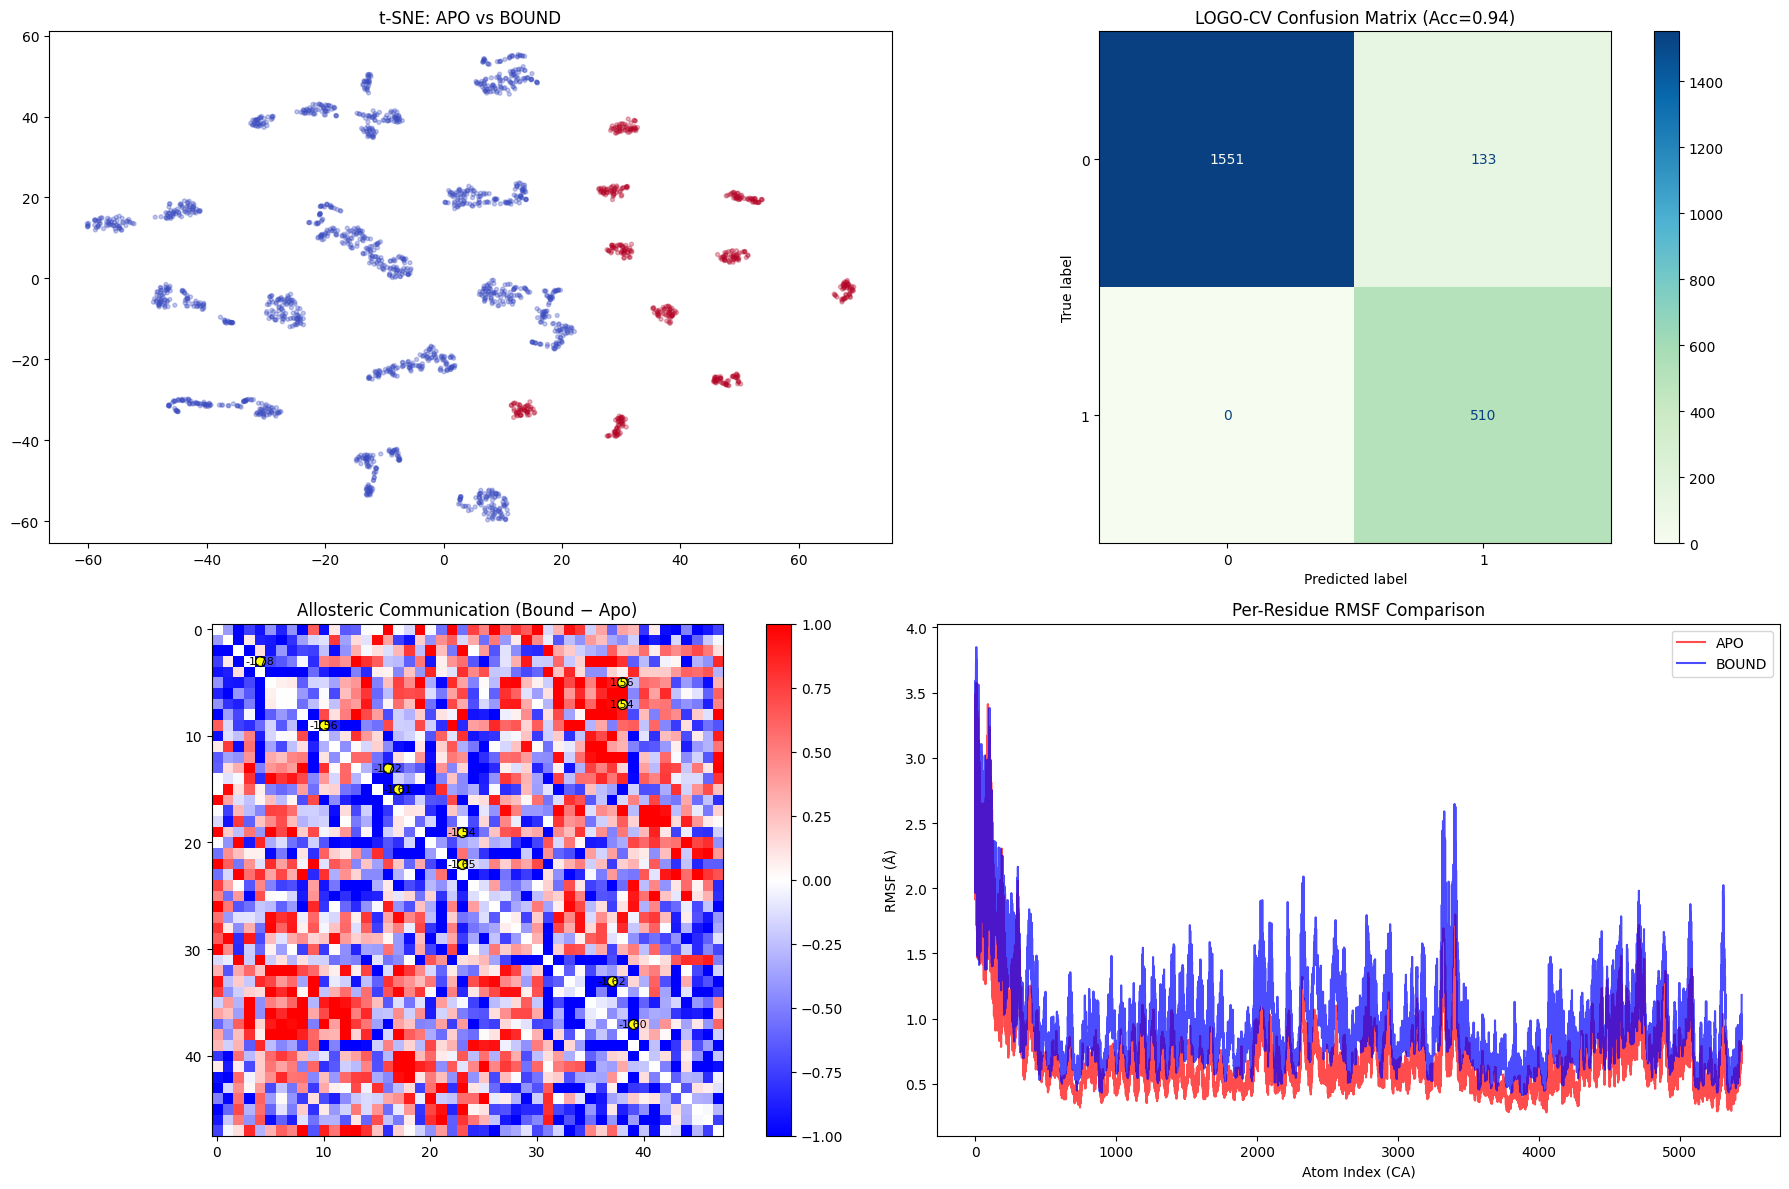

pipeline complete


In [ ]:
# ============================================================
# IMPORTS
# ============================================================
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.lib.distances import distance_array
from MDAnalysis.analysis.dihedrals import Ramachandran

from sklearn.model_selection import LeaveOneGroupOut, cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, HistGradientBoostingClassifier
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.manifold import TSNE

# ============================================================
# CONFIGURATION
# ============================================================
STRIDE = 20
TSNE_SUBSAMPLE = 5000
KPCA_COMPONENTS = 5
TOP_LINKS = 10  # Highlight top allosteric correlations

# File paths
apo_xtcs = [f"/content/sample_data/apo/prod_nosolv{str(i).zfill(2)}_ca_prot_aligned.xtc" for i in range(1, 11)]
bound_xtcs = [f"/content/sample_data/bound/prod_nosolv{str(i).zfill(2)}_ca_prot_aligned.xtc" for i in range(1, 11)]
pdb_path = "/content/sample_data/ref_ca_prot_aligned.pdb"

# ============================================================
# FEATURE EXTRACTION FUNCTION
# ============================================================
def extract_features(pdb_file, xtc_file, stride=STRIDE, global_pca=None):
    u = mda.Universe(pdb_file, xtc_file, in_memory=False, lowmem=True)
    ca = u.select_atoms("name CA")
    pocket4_loop = u.select_atoms("resid 1618:1626 and name CA")
    active_site = u.select_atoms("resid 1910:1930 and name CA")
    act_loop = u.select_atoms("resid 2020:2040 and name CA")

    if len(pocket4_loop) == 0 or len(active_site) == 0:
        print(f"Selection failed for {xtc_file}")
        return None, None, None

    all_coords = []
    all_features = []

    # RMSF
    all_positions = np.array([ca.positions.copy() for ts in u.trajectory[::stride]])
    rmsf = np.std(all_positions, axis=0).flatten()

    # Dihedrals
    try:
        dihed = Ramachandran(pocket4_loop).run()
        phi_psi_vals = dihed.results.angles
    except:
        phi_psi_vals = np.zeros((len(u.trajectory[::stride]), len(pocket4_loop), 2))

    for i, ts in enumerate(u.trajectory[::stride]):
        all_coords.append(ca.positions.flatten())
        d_active = distance_array(pocket4_loop.positions, active_site.positions).flatten()
        d_actloop = distance_array(pocket4_loop.positions, act_loop.positions).flatten()

        if phi_psi_vals.shape[0] > i:
            phi = phi_psi_vals[i][:, 0]
            psi = phi_psi_vals[i][:, 1]
            dihed_feat = np.concatenate([np.sin(phi), np.cos(phi), np.sin(psi), np.cos(psi)])
        else:
            dihed_feat = np.zeros(len(pocket4_loop)*4)

        frame_features = np.concatenate([rmsf, d_active, d_actloop, dihed_feat])
        all_features.append(frame_features)

    all_coords = np.array(all_coords)
    all_features = np.array(all_features)

    if global_pca is not None:
        pcs = global_pca.transform(all_coords)
        features = np.hstack([pcs, all_features])
    else:
        features = all_features

    return features, all_coords, rmsf

# ============================================================
# DATA COLLECTION
# ============================================================
X_all, y_all, groups_all = [], [], []
rmsf_apo_all, rmsf_bound_all = [], []
gid = 0

for label, xtcs in [(0, apo_xtcs), (1, bound_xtcs)]:
    for xtc in xtcs:
        feats, coords, rmsf = extract_features(pdb_path, xtc)
        if feats is None:
            continue

        kpca = KernelPCA(n_components=KPCA_COMPONENTS, kernel="rbf")
        coords_kpca = kpca.fit_transform(coords)
        X_rep = np.hstack([coords_kpca, feats])

        X_all.append(X_rep)
        y_all.extend([label]*len(X_rep))
        groups_all.extend([gid]*len(X_rep))

        if label == 0:
            rmsf_apo_all.append(rmsf)
        else:
            rmsf_bound_all.append(rmsf)
        gid += 1

X = np.vstack(X_all)
y = np.array(y_all)
groups = np.array(groups_all)
rmsf_apo_avg = np.mean(rmsf_apo_all, axis=0)
rmsf_bound_avg = np.mean(rmsf_bound_all, axis=0)
print(f"Total frames: {len(X)}, Feature dimension: {X.shape[1]}")

# ============================================================
# ML PIPELINE
# ============================================================
logo = LeaveOneGroupOut()
ensemble = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=2000, class_weight="balanced")),
        ("svc", SVC(kernel="rbf", C=10, probability=True, class_weight="balanced")),
        ("hgb", HistGradientBoostingClassifier(max_iter=100))
    ],
    voting="soft"
)
pipeline = Pipeline([("scaler", RobustScaler()), ("clf", ensemble)])
y_pred = cross_val_predict(pipeline, X, y, groups=groups, cv=logo)
acc = accuracy_score(y, y_pred)
print(f"\nLOGO-CV Accuracy: {acc:.3f}")
print(classification_report(y, y_pred))

# ============================================================
# t-SNE VISUALIZATION
# ============================================================
idx = np.random.choice(len(X), min(TSNE_SUBSAMPLE, len(X)), replace=False)
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42)\
            .fit_transform(RobustScaler().fit_transform(X[idx]))

# ============================================================
# DCCM ALLOSTERIC ANALYSIS
# ============================================================
def compute_dccm(u, ag, stride=STRIDE):
    coords = np.array([ag.positions.copy() for ts in u.trajectory[::stride]])
    mean = coords.mean(axis=0)
    fluc = coords - mean
    n = ag.n_atoms
    dccm = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            num = np.mean(np.sum(fluc[:, i] * fluc[:, j], axis=1))
            den = np.sqrt(np.mean(np.sum(fluc[:, i]**2, axis=1)) *
                          np.mean(np.sum(fluc[:, j]**2, axis=1)))
            dccm[i, j] = num / den if den != 0 else 0
    return dccm

u_apo = mda.Universe(pdb_path, apo_xtcs[0], in_memory=False, lowmem=True)
u_bound = mda.Universe(pdb_path, bound_xtcs[0], in_memory=False, lowmem=True)
lra8_loop = u_apo.select_atoms("resid 1618:1626 and name CA")
active_site = u_apo.select_atoms("resid 1910:1930 and name CA")
act_loop = u_apo.select_atoms("resid 2020:2040 and name CA")
network = lra8_loop + active_site + act_loop
dccm_diff = compute_dccm(u_bound, network) - compute_dccm(u_apo, network)

# ============================================================
# IDENTIFY TOP ALLOSTERIC LINKS
# ============================================================
n_atoms = network.n_atoms
# Get upper triangle indices to avoid redundancy
tri_idx = np.triu_indices(n_atoms, k=1)
# Flatten correlations
flat_corr = dccm_diff[tri_idx]
# Find top absolute correlations
top_idx = np.argsort(np.abs(flat_corr))[-TOP_LINKS:]
top_pairs = [(tri_idx[0][i], tri_idx[1][i], flat_corr[i]) for i in top_idx]

# ============================================================
# PLOTTING
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# t-SNE
axes[0,0].scatter(X_tsne[:,0], X_tsne[:,1], c=y[idx], s=8, alpha=0.3, cmap="coolwarm")
axes[0,0].set_title("t-SNE: APO vs BOUND")

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y, y_pred, ax=axes[0,1], cmap="GnBu")
axes[0,1].set_title(f"LOGO-CV Confusion Matrix (Acc={acc:.2f})")

# DCCM with top-links highlighted
im = axes[1,0].imshow(dccm_diff, cmap="bwr", vmin=-1, vmax=1)
axes[1,0].set_title("Allosteric Communication (Bound − Apo)")
plt.colorbar(im, ax=axes[1,0])
for i,j,val in top_pairs:
    axes[1,0].scatter(j, i, color="yellow", s=50, edgecolors="k")  # Highlight top links
    axes[1,0].text(j, i, f"{val:.2f}", color="black", fontsize=8, ha="center", va="center")

# RMSF Comparison
axes[1,1].plot(rmsf_apo_avg, color="red", alpha=0.7, label="APO")
axes[1,1].plot(rmsf_bound_avg, color="blue", alpha=0.7, label="BOUND")
axes[1,1].set_title("Per-Residue RMSF Comparison")
axes[1,1].set_xlabel("Atom Index (CA)")
axes[1,1].set_ylabel("RMSF (Å)")
axes[1,1].legend()

plt.tight_layout()
plt.show()
print(f"pipeline complete")